# Introduction
Customer churn, or the loss of customers to competitors or account closure, poses a significant challenge to the banking industry. In this project, we aim to address this critical concern by leveraging data-driven solutions. By analyzing historical customer data, including demographic information, transaction records, and customer interactions, we seek to develop a predictive model that can identify potential churners—customers at risk of leaving the bank. The objective is to empower the bank with a proactive tool that offers insights into customer behavior and predicts churn, enabling timely retention strategies and the preservation of customer relationships. Through this project, we endeavor to enhance customer satisfaction, minimize financial losses, and strengthen the bank's competitive position in the industry. The chosen algorithm for this predictive task is Logistic Regression, a robust and interpretable method for binary classification, which will enable us to make data-informed decisions regarding customer retention.  
## Impact of customer churn on businesses
A company with a high churn rate loses many subscribers, resulting in lower growth rates and a greater impact on sales and profits. Companies with low churn rates can retain customers.

#  Problem Statement
### The "Bank Customer Churn Out Prediction " project aims to address the challenge of customer churn within XYZ bank.  This project seeks to identify the factors and develop a predictive model to understand and forecast which bank customers are most likely to churn, with the ultimate goal of implementing strategies to retain those customers.


# Importing necessary libraries


In [10]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence  import variance_inflation_factor
from sklearn.metrics import accuracy_score, classification_report

# Data Collection 

For our Bank Customer Churn Prediction project, we obtained historical customer data from the bank's records. This comprehensive dataset encompasses essential information, including customer demographics, transaction history, and records of customer interactions. The data was provided in a structured format, conveniently stored in a single CSV (Comma-Separated Values) file. This organized data source serves as the foundation for our analysis, enabling us to delve into the details of customer behavior and build a predictive model to identify potential churners.( For this project Data source is Kaggle)

In [47]:
# Loading Data from Local system and converting it into dataframe
csv_file_path = "D:\Data Science\Projects\Bank Customer Churn Prediction.csv"
df = pd.read_csv(csv_file_path)


# Exploratory Data Analysis
In the EDA phase, we meticulously examine the data, looking for outliers and missing values. Any missing data is carefully imputed using appropriate techniques to ensure data completeness. Additionally, some columns may require data cleaning to address missing or inconsistent values, further preparing the data for analysis. These crucial steps set the stage for building an accurate and robust predictive model to identify potential customer churn.

In [59]:
df.shape
# gives no. of rows, columns

(10000, 11)

In [60]:
df.head()
# know first five rows of data 

,Customer_ID,Credit_Score,Country,Gender,Age,Tenure,Balance,Credit_Card,Active_Member,Estimated_salary,Churn
0,15634602,619.00,France,Female,42,2,0.00,Yes,Yes,101348.88,1
1,15647311,608.00,Spain,Female,41,1,83807.86,No,Yes,112542.58,0
2,15619304,502.00,France,Female,42,8,159660.80,Yes,No,113931.57,1
3,15701354,699.00,France,Female,102,1,0.00,No,No,93826.63,0
4,15737888,850.00,Spain,Female,43,2,125510.82,Yes,Yes,79084.10,0


In [54]:
df.info()
#for getting a quick overview of the DataFrame, displaying the data types, non-null counts, and memory usage.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       10000 non-null  int64  
 1   Credit_Score      9900 non-null   float64
 2   Country           10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Credit_Card       10000 non-null  object 
 8   Active_Member     10000 non-null  object 
 9   Estimated_salary  10000 non-null  float64
 10  Churn             10000 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 859.5+ KB


In [93]:
df.dtypes
#to check the data types of each column in the DataFrame, which is important for data preprocessing and ensuring that columns have the correct data types.

Customer_ID           int64
Credit_Score        float64
Country              object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
Credit_Card          object
Active_Member        object
Estimated_salary    float64
Churn                 int64
dtype: object

In [56]:
df.describe()
#provides summary statistics for numerical columns,It helps in understanding the distribution of data and identifying potential outliers.


,Customer_ID,Credit_Score,Age,Tenure,Balance,Estimated_salary,Churn
count,10000.00,9900.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,15690940.57,650.48,38.95,5.01,76485.89,100090.24,0.20
std,71936.19,96.71,16.21,2.89,62397.41,57510.49,0.40
min,15565701.00,350.00,0.00,0.00,0.00,11.58,0.00
25%,15628528.25,584.00,32.00,3.00,0.00,51002.11,0.00
50%,15690738.00,652.00,37.00,5.00,97198.54,100193.91,0.00
75%,15753233.75,718.00,44.00,7.00,127644.24,149388.25,0.00
max,15815690.00,850.00,999.00,10.00,250898.09,199992.48,1.00


In [57]:
df.sample(15)
#for randomly selecting rows from the DataFrame, making it useful for data sampling , checks for biasness of data  

,Customer_ID,Credit_Score,Country,Gender,Age,Tenure,Balance,Credit_Card,Active_Member,Estimated_salary,Churn
3452,15722965,757.00,France,Male,57,3,89079.41,Yes,Yes,53179.21,1
3973,15669281,711.00,Spain,Male,38,3,128718.78,No,Yes,114793.45,0
2804,15751175,648.00,France,Female,44,2,0.00,Yes,No,58652.23,0
2979,15668385,642.00,France,Male,40,1,154863.15,Yes,Yes,138052.51,0
5792,15795186,562.00,France,Male,38,5,0.00,Yes,Yes,115700.20,0
3707,15620323,652.00,Spain,Female,42,3,83492.07,Yes,No,37914.12,0
8325,15682489,605.00,France,Male,27,9,0.00,Yes,No,198091.81,0
7548,15658504,584.00,Germany,Female,62,9,137727.34,No,No,121102.90,0
9596,15755084,531.00,France,Male,37,7,121854.45,Yes,Yes,147521.35,0
5214,15709474,740.00,Germany,Female,57,3,113386.36,Yes,No,65121.63,1


In [64]:
df.nunique()
#counts the number of unique values in each column,  help in understanding the diversity of data within each column.

Customer_ID         10000
Credit_Score          460
Country                 3
Gender                  2
Age                    90
Tenure                 11
Balance              6382
Credit_Card             2
Active_Member           2
Estimated_salary     9999
Churn                   2
dtype: int64

# By using Graphical presentation 

useful for understanding the underlying distribution of data  

visualize the distribution of a single variable.
 
Outliers often appear as isolated peaks or troughs in a KDE plot.

Text(0.5, 1.0, 'KDE of Credit_Score')

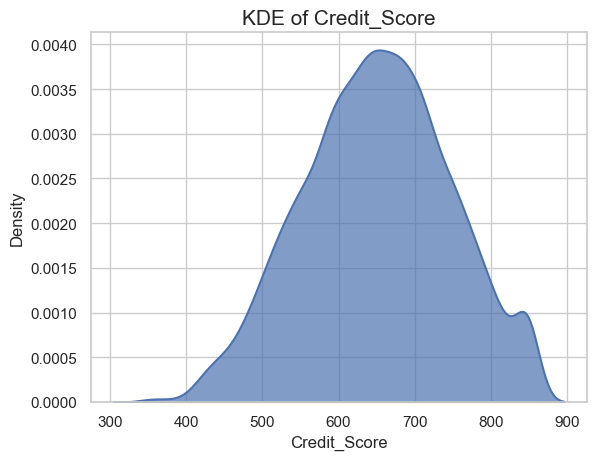

In [94]:
sns.set(style="whitegrid")
sns.kdeplot(data=df["Credit_Score"], fill=True, common_norm=False, alpha=0.7, linewidth=1.5)

plt.title("KDE of Credit_Score",fontsize=15)

Text(0.5, 1.0, 'KDE of Age')

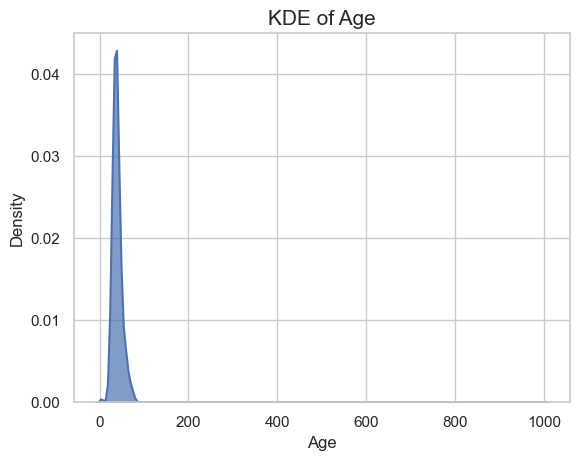

In [95]:
sns.set(style="whitegrid")
sns.kdeplot(data=df["Age"], fill=True, common_norm=False, alpha=0.7, linewidth=1.5)

plt.title("KDE of Age",fontsize=15)

Text(0.5, 1.0, 'Estimated_salary')

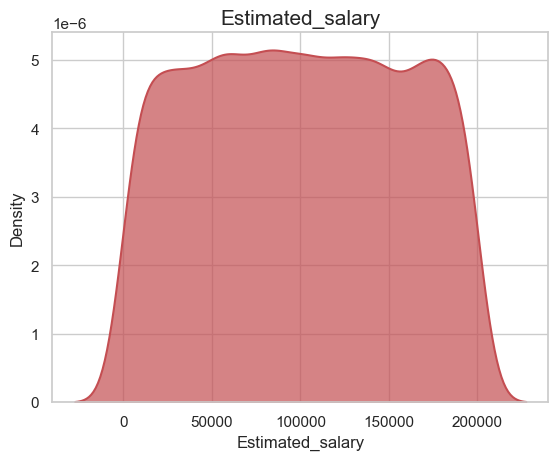

In [126]:
sns.set(style="whitegrid")
sns.kdeplot(data=df["Estimated_salary"], fill=True, common_norm=False, alpha=0.7, linewidth=1.5,color="r")

plt.title("Estimated_salary",fontsize=15)

Text(0.5, 1.0, 'KDE plot of Balance')

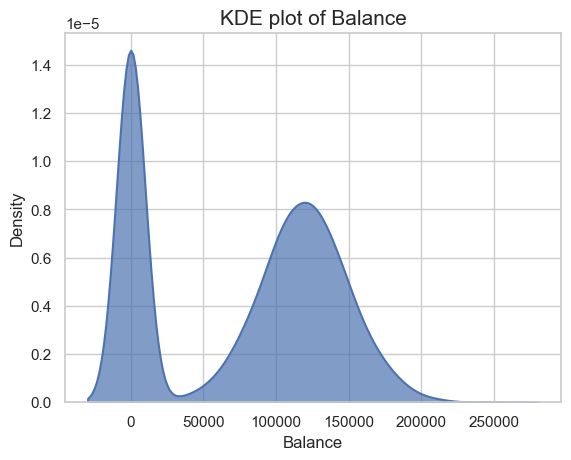

In [110]:
sns.set(style="whitegrid")
sns.kdeplot(data=df["Balance"], fill=True, alpha=0.7, linewidth=1.5,cmap="winter")

plt.title("KDE plot of Balance",fontsize=15)

<Axes: >

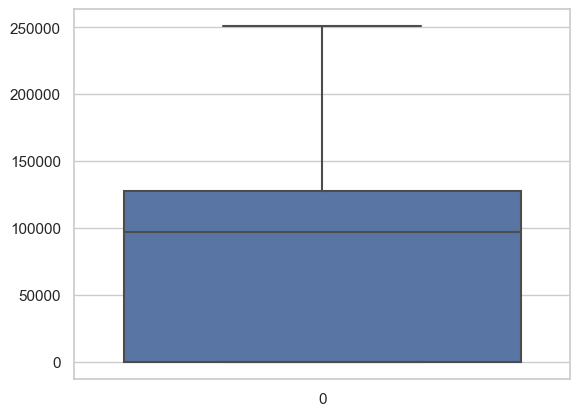

In [127]:
sns.boxplot(df["Balance"])

<Axes: >

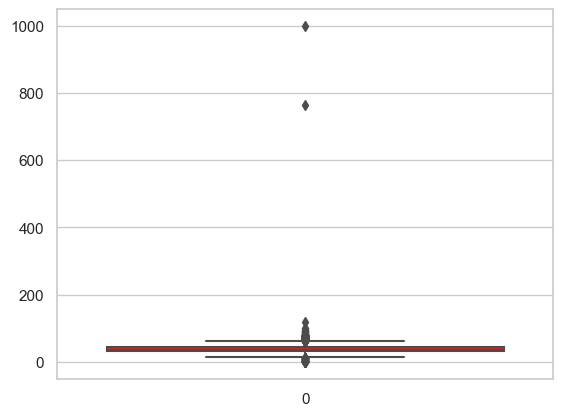

In [139]:

sns.boxplot(df["Age"],color="red")

<Axes: >

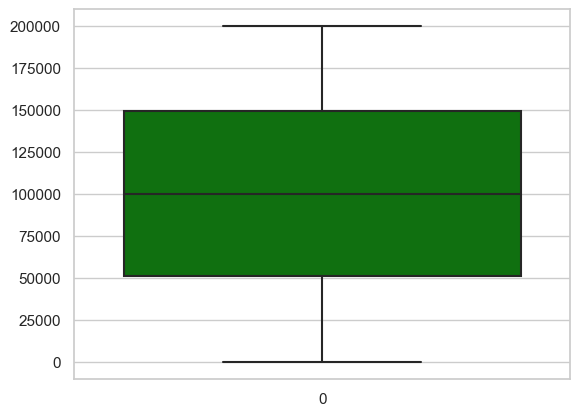

In [141]:
sns.boxplot(df["Estimated_salary"],color="green")

<Axes: >

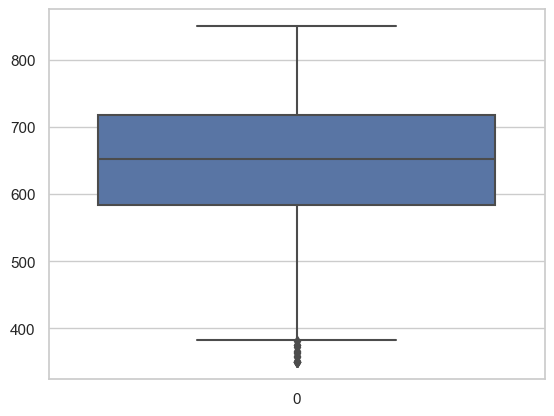

In [143]:
sns.boxplot(df["Credit_Score"],color="b")